# WeatherPy
----

#### Analysis
* 1
* 2
* 3


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
cloudiness =[]
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
latitude = []
longitude = []
final_cities = []

for city in cities:

    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    #print(weather_response)
    
    if weather_response.status_code == 404:
        print("City not found. Skipping...")
    else:
        weather_json = weather_response.json()
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        final_cities.append(city)

        print(f"Processing Record {city}.")


Processing Record kapaa.
Processing Record kisiwani.
Processing Record cape town.
Processing Record tiznit.
Processing Record sao jose da coroa grande.
Processing Record atuona.
Processing Record barrow.
City not found. Skipping...
Processing Record port elizabeth.
Processing Record ellensburg.
Processing Record yantal.
Processing Record mataura.
Processing Record mehamn.
Processing Record bilma.
Processing Record jamestown.
Processing Record banda aceh.
Processing Record tenenkou.
Processing Record dikson.
City not found. Skipping...
Processing Record calabozo.
City not found. Skipping...
Processing Record bonthe.
Processing Record adrar.
Processing Record salalah.
Processing Record rikitea.
Processing Record ushuaia.
Processing Record ambon.
Processing Record pevek.
Processing Record qingdao.
Processing Record pag.
Processing Record quatre cocos.
City not found. Skipping...
Processing Record chuy.
Processing Record port alfred.
Processing Record vila do maio.
Processing Record puerto

Processing Record cassia.
Processing Record vangaindrano.
Processing Record strezhevoy.
Processing Record utevka.
Processing Record ancud.
Processing Record yar-sale.
Processing Record tobol.
Processing Record okhotsk.
Processing Record iqaluit.
Processing Record moose factory.
Processing Record liberal.
Processing Record kushima.
Processing Record miri.
Processing Record novoagansk.
Processing Record payson.
Processing Record moron.
Processing Record ambilobe.
Processing Record roald.
Processing Record glace bay.
Processing Record kargopol.
Processing Record jatiroto.
Processing Record kosh-agach.
Processing Record fortuna.
Processing Record mubende.
City not found. Skipping...
Processing Record ghanzi.
Processing Record lucapa.
Processing Record upernavik.
Processing Record swan hill.
City not found. Skipping...
Processing Record galesong.
Processing Record laguna.
Processing Record tuscaloosa.
Processing Record escarcega.
Processing Record lepe.
Processing Record zheleznogorsk.
Proc

Processing Record chama.
Processing Record eureka.
City not found. Skipping...
Processing Record zhuhai.
Processing Record rorvik.
Processing Record skibbereen.
Processing Record benguela.
Processing Record noumea.
Processing Record jiwani.
Processing Record seoul.
Processing Record tarakan.
Processing Record san carlos.
Processing Record araouane.
Processing Record marrakesh.
Processing Record nakusp.
Processing Record khategaon.
Processing Record coolum beach.
Processing Record ocampo.
Processing Record jasper.
Processing Record khani.
Processing Record garissa.
Processing Record agua prieta.
Processing Record portree.
Processing Record omsukchan.
Processing Record pangnirtung.
City not found. Skipping...
Processing Record murmashi.
Processing Record port lincoln.
Processing Record tirumullaivasal.
Processing Record santa cruz.
Processing Record miquelon.
Processing Record cam ranh.
Processing Record khasan.
Processing Record luganville.
Processing Record sartell.
Processing Record k

In [4]:
    
weather_data_df = pd.DataFrame({
    "City": final_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

weather_data_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,75,US,1569908217,78,22.08,-159.32,80.60,12.75
1,kisiwani,77,TZ,1569908217,63,-4.13,37.95,78.17,4.74
2,cape town,0,ZA,1569908217,76,-33.93,18.42,63.00,9.17
3,tiznit,36,MA,1569908217,62,29.70,-9.73,72.95,1.43
4,sao jose da coroa grande,39,BR,1569908218,89,-8.90,-35.15,70.79,2.08


In [6]:
weather_data_df.to_csv(output_data_file, index = None, header = True)

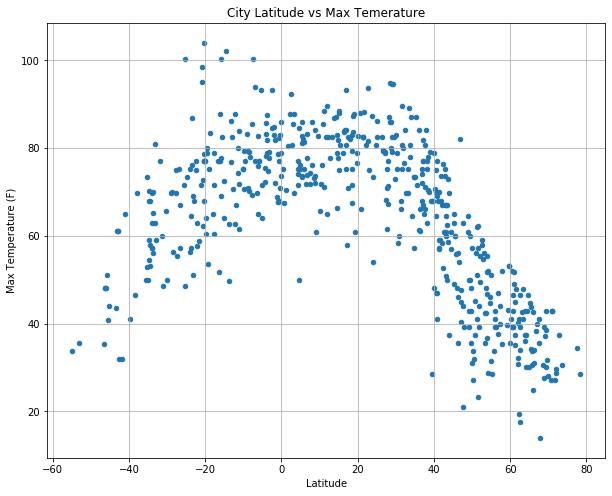

In [17]:
weather_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp', grid = True, figsize=(10,8), title = 'City Latitude vs Max Temerature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

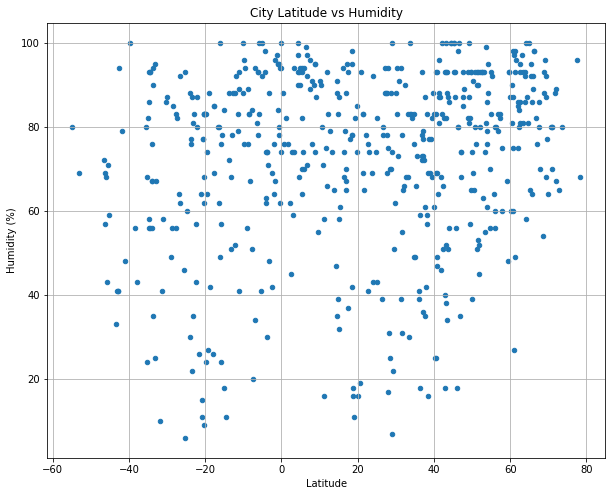

In [13]:
weather_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Humidity', grid = True, figsize=(10,8), title = 'City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

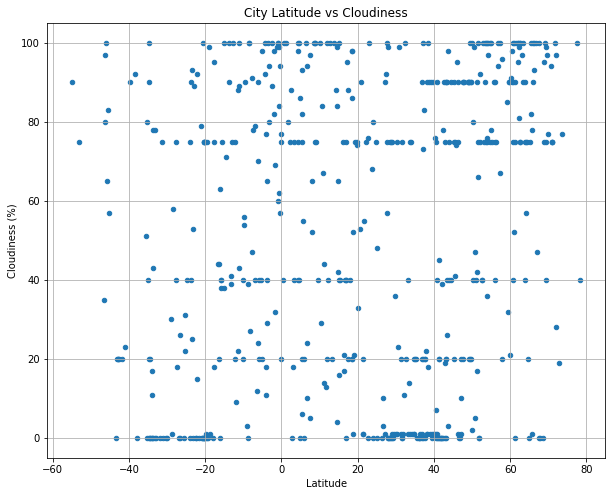

In [14]:
weather_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness', grid = True, figsize=(10,8), title = 'City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

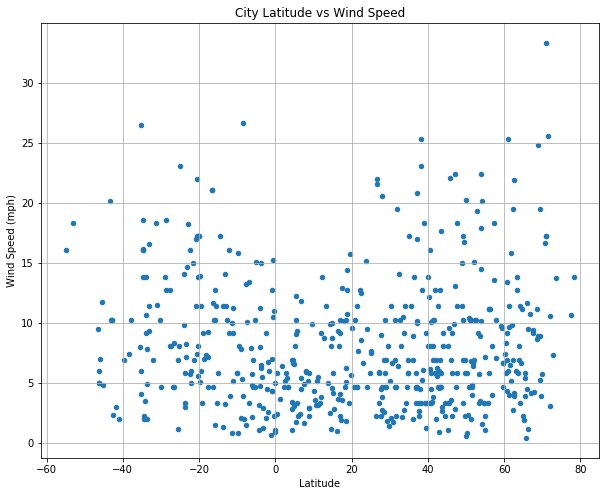

In [15]:
weather_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed', grid = True, figsize=(10,8), title = 'City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()